# Maestría en Maestría en Ciencia de Datos e Inteligencia Artificial
#### 8. Machine Learning and Deep Learning
#### Docente: Msc. Renzo Claure Aracena.

In [1]:
!pip install graphviz

### Random Forest

In [2]:
from sklearn.ensemble import RandomForestClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs, load_breast_cancer

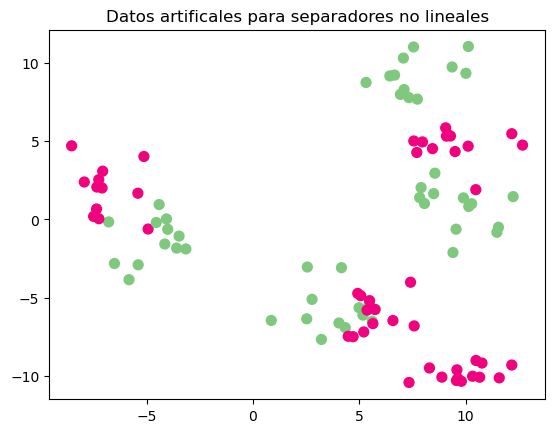

In [3]:
cmap_bold = ListedColormap(['#7fc97f', '#ffff99','#386cb0', '#f0027f'])
X_CL2, y_CL2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_CL2 = y_CL2 % 2
plt.figure()
plt.title('Datos artificales para separadores no lineales')
plt.scatter(X_CL2[:,0], X_CL2[:,1], c=y_CL2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

In [1]:
print("something")

something


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_CL2, y_CL2)
clasifRF = RandomForestClassifier().fit(X_train, y_train)

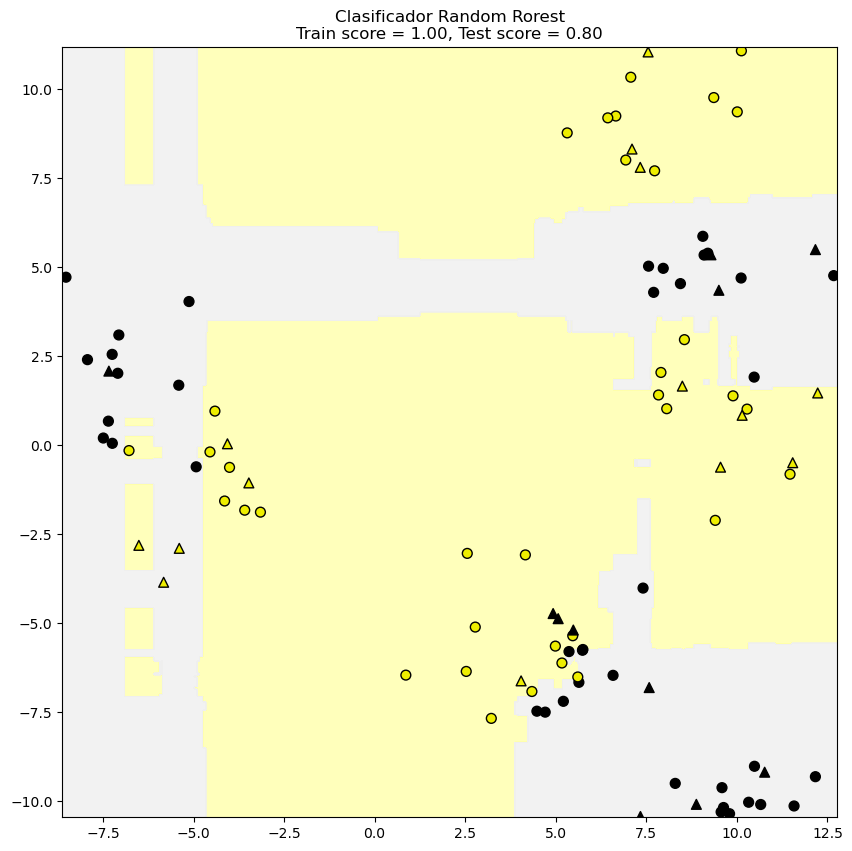

In [5]:
%matplotlib inline
fig, subaxes = plt.subplots(1,1, figsize=(10,10))
plot_class_regions_for_classifier_subplot(clasifRF, X_train, y_train, X_test, y_test, 'Clasificador Random Rorest', subaxes)
plt.show()

In [7]:
clasifRF.score(X_train, y_train)

1.0

In [8]:
clasifRF.score(X_test, y_test)

0.76

In [ ]:
#Ejemplo Cancer

In [ ]:
cancer = pd.read_csv('files/cancer.csv', delimiter = ";", decimal=",")
cancer.head()

,ID,Tipo,Radio,Textura,Perimetro,Area,Suavidad,Compactavidad,Concavidad,Puntos_concavos,Simetria,Fractal
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [10]:
X = cancer.drop(['ID', 'Tipo'], axis=1)
y = cancer['Tipo']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 )
clasifRFCancer = RandomForestClassifier(max_features = 10, random_state = 0)
clasifRFCancer.fit(X_train, y_train)

RandomForestClassifier(max_features=10, random_state=0)

In [12]:
print('Exactitud Entrenamiento: {:.3f} '.format(clasifRFCancer.score(X_train, y_train)))
print('Exactitud Validación: {:.3f} '.format(clasifRFCancer.score(X_test, y_test)))

Exactitud Entrenamiento: 1.000 
Exactitud Validación: 0.937 


In [ ]:
#Reducir el sobre ajuste
# usando max_features

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 )
clasifRFCancer = RandomForestClassifier(max_features = 2, random_state = 0)
clasifRFCancer.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=0)

In [14]:
print('Exactitud Entrenamiento: {:.3f} '.format(clasifRFCancer.score(X_train, y_train)))
print('Exactitud Validación: {:.3f} '.format(clasifRFCancer.score(X_test, y_test)))

Exactitud Entrenamiento: 1.000 
Exactitud Validación: 0.937 


In [ ]:
#Reducir el sobre ajuste
# usando N_estimators

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0 )
clasifRFCancer = RandomForestClassifier(max_features = 3, n_estimators=3, random_state = 0)
clasifRFCancer.fit(X_train, y_train)

RandomForestClassifier(max_features=3, n_estimators=3, random_state=0)

In [16]:
print('Exactitud Entrenamiento: {:.3f} '.format(clasifRFCancer.score(X_train, y_train)))
print('Exactitud Validación: {:.3f} '.format(clasifRFCancer.score(X_test, y_test)))

Exactitud Entrenamiento: 0.986 
Exactitud Validación: 0.930 


### Gradient Boosting

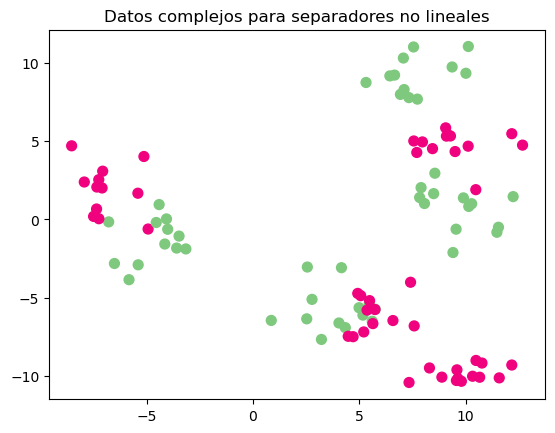

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Datos complejos para separadores no lineales')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

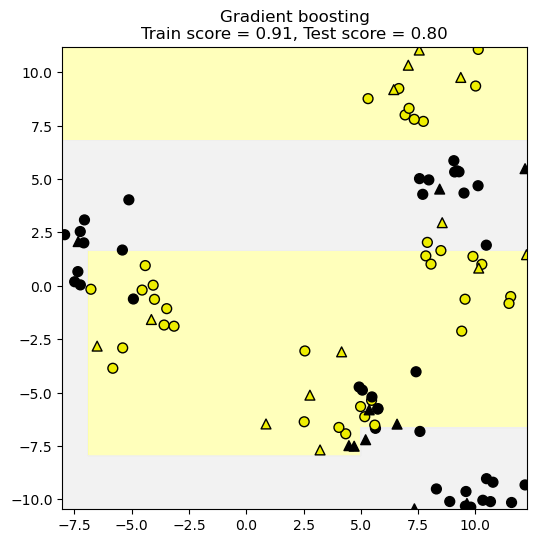

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier(n_estimators=10).fit(X_train, y_train)

plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test, y_test, 'Gradient boosting', subaxes)
plt.show()

In [19]:
print('entrenamiento: ',clf.score(X_train, y_train))
print('comprobacion: ',clf.score(X_test, y_test))

entrenamiento:  0.9066666666666666
comprobacion:  0.8


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

clf = GradientBoostingClassifier(learning_rate = 0.001, max_depth = 2, random_state = 0).fit(X_train, y_train)

print('entrenamiento: ',clf.score(X_train, y_train))
print('comprobacion: ',clf.score(X_test, y_test))

entrenamiento:  0.76
comprobacion:  0.72


Ejemplo de Clasificación de productos

In [ ]:
producto = pd.read_csv('files/COMPRA DE PRODUCTOS.csv', delimiter=';', decimal=',')
producto.head()

,ID,GRUPO_PRODUCTO,CON_LINEA_CREDITO,INGRESO_NETO,INGRESO_ITEM_1,INGRESO_ITEM_2,MESES_ANTIGUEDAD
0,130,4,SI,39.239862,15.797045,14.423,116
1,133,4,SI,8.671353,6.059353,0.000,68
2,238,2,SI,168.801714,82.770594,69.167,99
3,251,2,SI,115.562372,93.957372,0.725,30
4,273,4,SI,32.645475,17.150819,10.723,60


In [24]:
producto1 = producto[(producto['CON_LINEA_CREDITO'] == 'SI')  ] 
X = producto1[['INGRESO_NETO', 'INGRESO_ITEM_1', 'INGRESO_ITEM_2', 'MESES_ANTIGUEDAD']]
y = producto1['GRUPO_PRODUCTO']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clasifGB2 = GradientBoostingClassifier().fit(X_train, y_train)
print('Exactitud Entrenamiento: {:.3f} '.format(clasifGB2.score(X_train, y_train)))
print('Exactitud Validación: {:.3f} '.format(clasifGB2.score(X_test, y_test)))

Exactitud Entrenamiento: 0.998 
Exactitud Validación: 0.993 


In [26]:
clasifGB2_2 = GradientBoostingClassifier(learning_rate = 0.1, random_state = 0).fit(X_train, y_train)
print('Exactitud Entrenamiento: {:.3f} '.format(clasifGB2_2.score(X_train, y_train)))
print('Exactitud Validación: {:.3f} '.format(clasifGB2_2.score(X_test, y_test)))

Exactitud Entrenamiento: 0.998 
Exactitud Validación: 0.993 


Haga lo mismo para los datos de Vino Rojo, tanto con RandomForest como GradientBoosting